In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

seed = 1

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/gender_classification.csv')
print(df.shape)
df.head()

(5001, 8)


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


Female    2501
Male      2500
Name: gender, dtype: int64


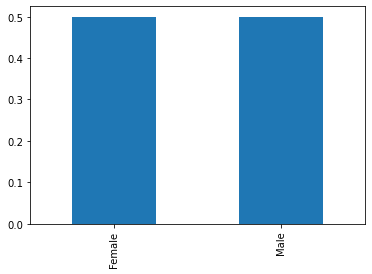

In [3]:
#dataset is balanced
print(df.gender.value_counts())
df.gender.value_counts(normalize=True).plot.bar()
plt.show()

In [4]:
df.gender = df.gender.replace({'Male':1, 'Female' : 0})
df.gender.unique()

array([1, 0])

In [5]:
X = df.drop(columns=['gender'])
Y = df[['gender']]
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=seed,
                                                    shuffle=True,
                                                    stratify=Y.gender)

print(X.shape)
print(X.shape)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5001, 7)
(5001, 7)
(4000, 7)
(4000, 1)
(1001, 7)
(1001, 1)


In [17]:
model = Sequential()

model.add(Input(shape=(x_train.shape[1],), name="Input"))
model.add(Dense(12, activation='relu', name="layer1", use_bias=True))
model.add(Dense(8, activation='relu', name="layer2", use_bias=True))
model.add(Dense(1, activation='sigmoid', name="output"))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 12)                96        
_________________________________________________________________
layer2 (Dense)               (None, 8)                 104       
_________________________________________________________________
output (Dense)               (None, 1)                 9         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [18]:
es = EarlyStopping(monitor='val_loss',patience =2, verbose=1)

In [19]:
history = model.fit(x_train,y_train,epochs=10,batch_size=10, validation_data=(x_test,y_test),callbacks=[es])

Train on 4000 samples, validate on 1001 samples
Epoch 1/10
4000/4000 [==============================] - 1s 285us/sample - loss: 0.3006 - accuracy: 0.9060 - val_loss: 0.1425 - val_accuracy: 0.9520
Epoch 2/10
4000/4000 [==============================] - 1s 165us/sample - loss: 0.1190 - accuracy: 0.9510 - val_loss: 0.1039 - val_accuracy: 0.9530
Epoch 3/10
4000/4000 [==============================] - 1s 164us/sample - loss: 0.1035 - accuracy: 0.9540 - val_loss: 0.0956 - val_accuracy: 0.9520
Epoch 4/10
4000/4000 [==============================] - 1s 162us/sample - loss: 0.1012 - accuracy: 0.9473 - val_loss: 0.0917 - val_accuracy: 0.9500
Epoch 5/10
4000/4000 [==============================] - 1s 162us/sample - loss: 0.1009 - accuracy: 0.9510 - val_loss: 0.0901 - val_accuracy: 0.9530
Epoch 6/10
4000/4000 [==============================] - 1s 162us/sample - loss: 0.0992 - accuracy: 0.9523 - val_loss: 0.0894 - val_accuracy: 0.9540
Epoch 7/10
4000/4000 [==============================] - 1s 162us

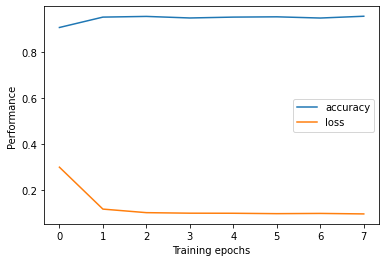

In [20]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['loss'],label='loss')
plt.xlabel('Training epochs')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [23]:
scores = model.evaluate(x_train, y_train)
print ("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(x_test, y_test)
print ("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

4000/4000 [==============================] - 0s 23us/sample - loss: 0.0940 - accuracy: 0.9480
Training Accuracy: 94.80%

1001/1001 [==============================] - 0s 22us/sample - loss: 0.0896 - accuracy: 0.9550
Testing Accuracy: 95.50%

